<a href="https://colab.research.google.com/github/Priyadarshini-yadav13/Time_Series/blob/main/Time_series_coding__part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing the libraries

In [1]:
!pip install pmdarima

In [2]:
!pip install numpy==1.26.4

#Importing the necessary libraries

In [3]:
import pandas as pd
import numpy as np

# Read data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv("/content/drive/MyDrive/Time_series/AirPassengers.csv", index_col="Month", parse_dates=True)

In [6]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [7]:
df.shape

(144, 1)

In [8]:
df.tail(1)

,#Passengers
Month,
1960-12-01,432


In [9]:
df.dtypes

,0
#Passengers,int64


# Performing EDA

In [11]:
df.isnull().sum()

,0
#Passengers,0


# There is no null values.

In [12]:
df.duplicated().sum()

26

# There are 26 duplicated file.

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-07-01,622
1960-08-01,606
1960-09-01,508


In [15]:
df.shape

(118, 1)

# Plot the data

In [16]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-07-01,622
1960-08-01,606
1960-09-01,508


<Axes: xlabel='Month'>

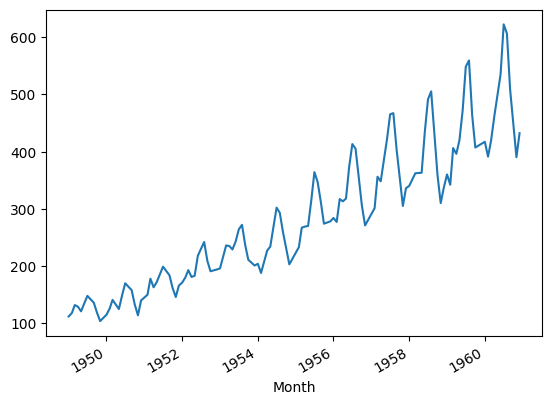

In [23]:
df['#Passengers'].plot()

# Its a cycle data.

#Figure Out the Order for ARIMA Model

In [24]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(df['#Passengers'],

                          suppress_warnings=True)

stepwise_fit.summary()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  118
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -561.163
Date:                Thu, 10 Jul 2025   AIC                           1134.325
Time:                        07:22:57   BIC                           1150.899
Sample:                             0   HQIC                          1141.054
                                - 118                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.4198      0.319      4.450      0.000       0.794       2.045
ar.L1          1.4102      0.065     21.576      0.000       1.282       1.538
ar.L2         -0.8310      0.048    -17.451      0.000      -0.924      -0.738
ma.L1         -1.5603      0.104    -14.989      0.000      -1.764      -1.356
ma.L2          0.6468      0.095      6.787      0.000       0.460       0.834
sigma2       838.6296     89.039      9.419      0.000     664.116    1013.143
===================================================================================
Ljung-Box (L1) (Q):                   0.76   Jarque-Bera (JB):                 7.27
Prob(Q):                              0.38   Prob(JB):                         0.03
Heteroskedasticity (H):               7.63   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#We got the values (2,1,2)
where 2 is P parameter means number of previous time points used to predict the future value.
1 is d parameter which is integrated part means how many times we need to "difference" the data to make it stationary.
2 is q parameter which is moving average part refers to the number of past forecast errors used to predict the future.

#Loading ARIMA Model

In [31]:
from statsmodels.tsa.arima.model import ARIMA

In [34]:
df.head(13)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-09-01,136
1949-10-01,119


In [35]:
train = df.iloc[:-12]

In [36]:
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-04-01,396
1959-05-01,420
1959-06-01,472


In [37]:
test=df.iloc[-12:]

In [38]:
test

,#Passengers
Month,
1959-09-01,463
1959-10-01,407
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-06-01,535
1960-07-01,622
1960-08-01,606


#Train the Model

In [39]:
model = ARIMA(train['#Passengers'],order=(2,1,2))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [40]:
model = model.fit()

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  106
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -502.378
Date:                Thu, 10 Jul 2025   AIC                           1014.757
Time:                        07:44:10   BIC                           1028.026
Sample:                             0   HQIC                          1020.134
                                - 106                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5809      0.025     62.203      0.000       1.531       1.631
ar.L2         -0.9668      0.029    -33.423      0.000      -1.023      -0.910
ma.L1         -1.6916      0.042    -39.841      0.000      -1.775      -1.608
ma.L2          0.9527      0.043     22.285      0.000       0.869       1.037
sigma2       803.7222    102.060      7.875      0.000     603.689    1003.756
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):                18.90
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               7.48   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#Make Predictions on Test Set

In [42]:
start = len(train)

In [43]:
end = len(train)+len(test)-1

In [44]:
start,end

(106, 117)

In [45]:
pred = model.predict(start=start,end=end)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [46]:
pred

,predicted_mean
106,505.865133
107,456.744669
108,430.461456
109,436.399710
110,471.197145
111,520.466055
112,564.712064
113,587.026952
114,579.527822
115,546.099331


In [47]:
test # Actual Test Data

,#Passengers
Month,
1959-09-01,463
1959-10-01,407
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-06-01,535
1960-07-01,622
1960-08-01,606


<Axes: xlabel='Month'>

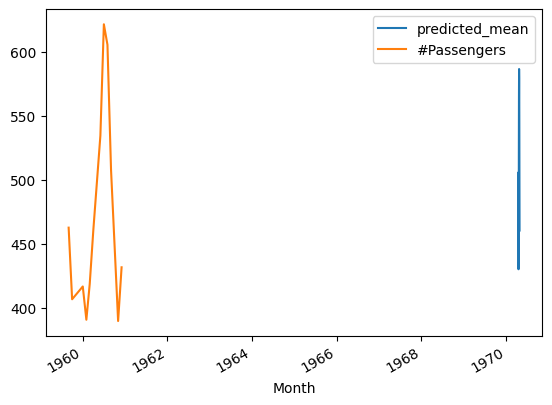

In [53]:
pred.plot(legend='model_prediction')
test['#Passengers'].plot(legend=True)

In [51]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(pred, test['#Passengers']))

print('Root Mean Square Error:',rmse)

Root Mean Square Error: 50.09189028771457
